**This tutorial uses a dataset of human height and weight to introduce the following:**

* Numpy and Pyplot, the basic tools for any Python data science or machine learning project
* Tensor indexing, broadcasting, and normalization: common data manipulation techniques

**After you've read, run, and understood the code, try to modify it as follows:**
* Easy: Visualize only the data points 10...20 
* Harder: Visualize how the mean of height changes when you compute it from ranges of different lengths. You might make use of a for loop (Google python for loop if you don't know how). It is important to understand that mean and standard deviation computed from random data are also random variables; using them as estimates of the actual mean and sd becomes more reliable with more data.

Model solutions are provided in the same folder, but first try to solve the problem yourself, at least for a few minutes. *Think of this as a puzzle game with optional hints that you will check only if you have to.*

Let's start by importing the tools we need:

In [1]:
#the pylab inline may be needed to make figures visible in Jupyter, depending on your Anaconda installation
%pylab inline
import numpy as np
import matplotlib.pyplot as pp

Now, let's load some data to process. We'll use the human height and weight dataset from Kaggle, which is in .csv format. This is a common and perhaps the most simple data format -- try opening it in a text editor. Loading .csv using Numpy is easy.

Note that we skip one row which has the headers, and we only extract the second and third column. In Numpy, indices start from zero, i.e., 1 means the second instead of the first column.

In [2]:
data=np.loadtxt("../Datasets/weight-height.csv",skiprows=1,usecols=(1,2),delimiter=",")
print(data)

[[ 73.84701702 241.89356318]
 [ 68.78190405 162.31047252]
 [ 74.11010539 212.74085556]
 ...
 [ 63.86799221 128.47531878]
 [ 69.03424313 163.85246135]
 [ 61.94424588 113.64910268]]


When printing the data, we see that it is a 2D-array or 'tensor'. Machine learning typically utilizes tensors to store and manipulate data. Numpy is the basic package for manipulating tensors on the CPU, and Tensorflow and PyTorch allow one to do the same on the GPU, with some additional features.

** IMPORTANT: Becoming fluent in thinking and coding with tensors takes time but is extremely vital.** 

Let's investigate the data a bit more.

For example, each tensor has a shape: an 1D array that tells about the tensor dimensions. We can also query the number of dimensions with ndim(). The number of dimensions is also called the "rank" of the tensor. In linear algebra terms, a scalar is a rank-0 tensor, a vector is a rank-1 tensor, and a matrix is a rank-2 tensor.

Unlike with vectors and matrices, A\*B multiplies the tensors A and B elementwise, and if A and B are vectors, one can use np.dot(A,B) to compute the dot product.

In [21]:
print("Data shape ",data.shape,", rank ",np.ndim(data))

Data shape  (10000, 2) , rank  2


In other words, there's 10000 data points, each with 2 values. The tensor is a 2D one. The first dimension indexes over data points, and the second over different variables. In this dataset, the first variable is height and the second is weight.

Numpy allows very flexible indexing of tensors. One can define exact indexes or use ":" to denote all indexes along a dimension. As an example, let's do some unit conversion: The height values are in inches, and we can multiply them with 2.54 to convert them to meters:

In [4]:
data[:,0]*=2.54  #Here, we use the *= shorthand, which is the same as data[:,0]=data[:,0]*2.54
print(data)

[[187.57142322 241.89356318]
 [174.70603628 162.31047252]
 [188.2396677  212.74085556]
 ...
 [162.22470022 128.47531878]
 [175.34697755 163.85246135]
 [157.33838453 113.64910268]]


Note: if you run the code above for many times, you keep multiplying the height, as Jupyter maintains the program state. You can fix this by 1) manually re-running the data loading code above or 2) selecting "Restart & Run All" from the Kernel menu at the top of the page.

Let's now do similar scaling for weight, which is given in pounds.

In [5]:
data[:,1]*=0.45359237
print(data)

[[187.57142322 109.72107461]
 [174.70603628  73.62279191]
 [188.2396677   96.49762887]
 ...
 [162.22470022  58.27542433]
 [175.34697755  74.32222627]
 [157.33838453  51.55036583]]


Now, let's try some data visualization using PyPlot. 

**Note: if you run this code outside Jupyter, you first need to create a new figure using pp.figure() and finally say pp.show() to make the figure visible.**

Text(0, 0.5, 'Weight (kilograms)')

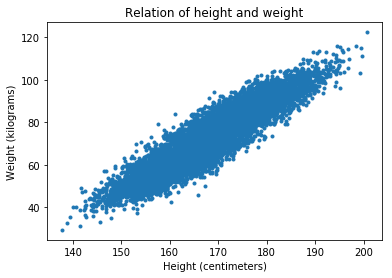

In [6]:
pp.scatter(data[:,0],data[:,1],marker=".")
pp.title("Relation of height and weight")
pp.xlabel("Height (centimeters)")
pp.ylabel("Weight (kilograms)")

Not surprisingly, there's a strong correlation between height and weight. We can see that a 2m tall person typically weights around 110 kg. 

In the next exercise, we'll use some machine learning models to predict weight from height and vice versa, but let's now continue a bit more on introducing basic Numpy and Pyplot features.

Above, we've already used the ":" symbol to denote "all indices". It can also be used for defining arbitrary ranges. Note the following:
* The indexing is zero-based, i.e., index 1 is the second element and index 0 is the first.
* A range a:b includes a but not b. Instead, the last index in the range is b-1. 

Thus, this is how you print three elements starting from the second one:

In [7]:
print(data[1:4])

[[174.70603628  73.62279191]
 [188.2396677   96.49762887]
 [182.19668514  99.80958561]]


Note that giving only one index prints out the rest of the dimensions: A 2D tensor is effectively an array of 1D tensors. Equivalently, you can use:

In [8]:
print(data[1:4,:])

[[174.70603628  73.62279191]
 [188.2396677   96.49762887]
 [182.19668514  99.80958561]]


Finally, let's introduce a few more common tools and tricks: Compute the mean and standard deviation of the data.

In [22]:
#Numpy provides utilities for mean and standard deviation:
m=np.mean(data,axis=0) #we compute the mean across the first axis, i.e., the data entries
sd=np.std(data,axis=0)
print(m,sd)

[168.57360178  73.22811407] [ 9.77223278 14.56341472]


The results show that human average height is 169 cm, with standard deviation of 10cm. Now, let's normalize the data: subtract mean and divide by standard deviation. This is a common operation to make data *zero-mean, unit standard deviation*, which is what neural networks often need to work efficiently.

**Important note: the normalization below makes use of so-called broadcasting**, where numpy automatically expands tensors of lower rank to match higher-rank tensors. The data is a 2D tensor and m and sd are 1D tensors, as printed above. Broadcasting means that the 1D tensor is "replicated" along a new dimension, making it a 2D tensor. This is a generalization of what happens when you multiply a tensor with a plain number, i.e., a scalar or rank-0 tensor.

Broadcasting also works for tensors of similar rank in cases where one tensor has only 1 element along some dimension, i.e., a shape [1,3] tensor can be multiplied with shape [4,3] tensor.   

[[ 1.94406149  2.50579697]
 [ 0.62753668  0.02710064]
 [ 2.01244346  1.59780623]
 ...
 [-0.64968792 -1.02672965]
 [ 0.69312469  0.07512745]
 [-1.14970831 -1.48850724]]


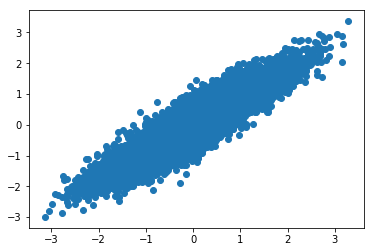

In [10]:
normalized=(data-m)/sd
print(normalized)
pp.scatter(normalized[:,0],normalized[:,1])

Typical to normally distributed (Gaussian) data, we see that values beyond 3 standard deviations from the mean are extremely rare.

If you want to know how rare a specimen you are, you can try the following:

In [11]:
myHeight=178
print("My height is",myHeight,"cm, which is ",(myHeight-m[0])/sd[0],"standard deviations from the mean")

My height is 178 cm, which is  0.9646104873306025 standard deviations from the mean


Finally, to transform back from normalized data to actual values, you can use:

In [12]:
denormalized=normalized*sd+m
print(denormalized)

[[187.57142322 109.72107461]
 [174.70603628  73.62279191]
 [188.2396677   96.49762887]
 ...
 [162.22470022  58.27542433]
 [175.34697755  74.32222627]
 [157.33838453  51.55036583]]


For pedagogical purposes, we showed above how to manually compute the mean and std and do the normalization/denormalization. Again, this is common because most neural networks work best when fed data with zero mean and standard deviation of one.

**In practice, one typically uses a scaler utility.** For example, the sklearn package provides one:

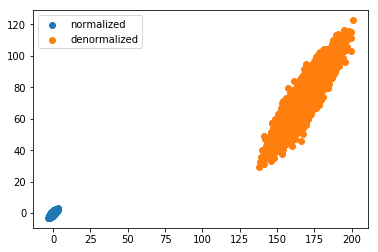

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
normalized=scaler.transform(data)
denormalized=scaler.inverse_transform(normalized)
pp.scatter(normalized[:,0],normalized[:,1],label="normalized")
pp.scatter(denormalized[:,0],denormalized[:,1],label="denormalized")
pp.legend()

This concludes the tutorial. We also learned how to plot multiple datasets in the same figure with legends, which will often be useful. 

**Now, go back to the top and try to implement the suggested modifications.**